In [2]:
import numpy as np

n = 500
velocity = np.zeros((n, 2), dtype=np.float32)
position = np.zeros((n, 2), dtype=np.float32)

In [3]:
dx = np.subtract.outer(position[:, 0], position[:, 0])
dy = np.subtract.outer(position[:, 1], position[:, 1])
distance = np.hypot(dx, dy)

In [4]:
mask_0 = (distance > 0)
mask_1 = (distance < 25)
mask_2 = (distance < 50)
mask_1 *= mask_0
mask_2 *= mask_0
mask_3 = mask_2

In [5]:
mask_1_count = np.maximum(mask_1.sum(axis=1), 1)
mask_2_count = np.maximum(mask_2.sum(axis=1), 1)
mask_3_count = mask_2_count

In [9]:
# Alignment

max_velocity = 10
mask, count = mask_1, mask_1_count

# Compute the average velocity of local neighbours
target = np.dot(mask, velocity)/count.reshape(n, 1)

# Normalize the result
norm = np.sqrt((target*target).sum(axis=1)).reshape(n, 1)
target *= np.divide(target, norm, out=target, where=norm != 0)

# Alignment at constant speed
target *= max_velocity

# Compute the resulting steering
alignment = target - velocity

In [10]:
# Cohesion

# Compute the gravity center of local neighbours
center = np.dot(mask, position)/count.reshape(n, 1)

# Compute direction toward the center
target = center - position

# Normalize the result
norm = np.sqrt((target*target).sum(axis=1)).reshape(n, 1)
target *= np.divide(target, norm, out=target, where=norm != 0)

# Cohesion at constant speed (max_velocity)
target *= max_velocity

# Compute the resulting steering
cohesion = target - velocity

In [11]:
# Separation

# Compute the repulsion force from local neighbours
repulsion = np.dstack((dx, dy))

# Force is inversely proportional to the distance
repulsion = np.divide(repulsion, distance.reshape(n, n, 1)**2, out=repulsion,
                      where=distance.reshape(n, n, 1) != 0)

# Compute direction away from others
target = (repulsion*mask.reshape(n, n, 1)).sum(axis=1)/count.reshape(n, 1)

# Normalize the result
norm = np.sqrt((target*target).sum(axis=1)).reshape(n, 1)
target *= np.divide(target, norm, out=target, where=norm != 0)

# Separation at constant speed (max_velocity)
target *= max_velocity

# Compute the resulting steering
separation = target - velocity

In [12]:
acceleration = 1.5 * separation + alignment + cohesion
velocity += acceleration
position += velocity

In [20]:
print(velocity.shape)
print(position)

(500, 2)
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 

In [15]:
from matplotlib.path import Path as Path

v= np.array([(-0.25, -0.25),
             ( 0.00,  0.50),
             ( 0.25, -0.25),
             ( 0.00,  0.00)])

c = np.array([Path.MOVETO,
              Path.LINETO,
              Path.LINETO,
              Path.CLOSEPOLY])

In [16]:
n = 500
vertices = np.tile(v.reshape(-1), n).reshape(n, len(v), 2)
codes = np.tile(c.reshape(-1), n)

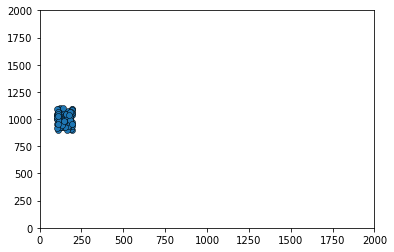

In [21]:
import numpy as np

boid_count = 10

limits = np.array([2000, 2000])

positions = np.random.rand(2, boid_count) * limits[:, np.newaxis]
positions

positions.shape

limits[:, np.newaxis]

limits[:, np.newaxis].shape

np.random.rand(2, boid_count).shape

def new_flock(count, lower_limits, upper_limits):
    width = upper_limits - lower_limits
    return (lower_limits[:, np.newaxis] + np.random.rand(2, count) * width[:, np.newaxis])

velocities = new_flock(boid_count, np.array([0, -20]), np.array([10, 20]))
velocities

positions += velocities

from matplotlib import animation
from matplotlib import pyplot as plt
%matplotlib inline

# create a simple plot
# initial x position in [100, 200], initial y position in [900, 1100]
# initial x velocity in [0, 10], initial y velocity in [-20, 20]
positions = new_flock(100, np.array([100, 900]), np.array([200, 1100]))
velocities = new_flock(100, np.array([0, -20]), np.array([10, 20]))

figure = plt.figure()
axes = plt.axes(xlim=(0, limits[0]), ylim=(0, limits[1]))
scatter = axes.scatter(positions[0, :], positions[1, :],
                       marker='o', edgecolor='k', lw=0.5)
scatter